In [1]:
import pandas as pd

datos = pd.read_csv("carros.csv")
datos.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
#situacion con los datos ordenados de la peor manera
datos_ord = datos.sort_values("vendido", ascending=True)
x_ord = datos_ord[["precio", "edad_del_modelo","km_by_year"]]
y_ord = datos_ord["vendido"]
datos_ord.head()

,precio,vendido,edad_del_modelo,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [3]:
# usando el modelo DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier(strategy='stratified')
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Usando el modelo DummyClassifier con cross_validate, Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Usando el modelo DummyClassifier con cross_validate, Accuracy con dummy stratified, 10 = [49.79, 53.45]


In [4]:
# usando el modelo DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


In [5]:
#generando datos aleatorios del modelo de carro
np.random.seed(SEED)
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,km_by_year,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [7]:
# GroupKFold en un pipeline con StandardScaler y el modelo SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

# usa 10 divisiones
cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 76.68
Intervalo [74.28, 79.08]


In [8]:
# modelo DecisionTreeClassifier (árbol de decisión), GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

# el modelo será probado 10 veces y a generado 10 modelos
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


In [9]:
modelo

DecisionTreeClassifier(max_depth=2)

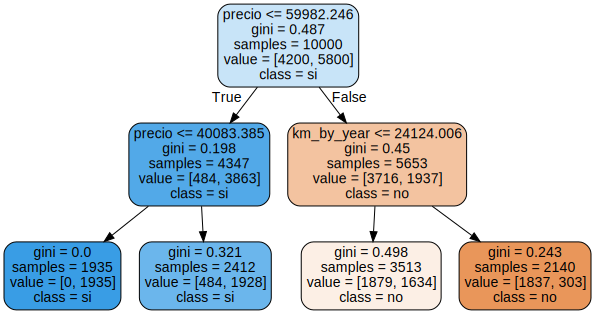

In [10]:
# gráfico del árbol de decisión
from sklearn.tree import export_graphviz
import graphviz

# generar el modelo de prueba, esto es resultado del entrenamiento de los 10 modelos
# modelo.fit(las_caracteristicas, variable_a_predecir)
modelo.fit(x_ord, y_ord)

features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=['no', 'si'], feature_names=features)

# guarda el resultado de la visualización
graph = graphviz.Source(dot_data)
graph

Profundidad de 3

In [11]:
# modelo DecisionTreeClassifier (árbol de decisión), GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

# el modelo será probado 10 veces y a generado 10 modelos
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 78.67
Intervalo [76.40, 80.94]


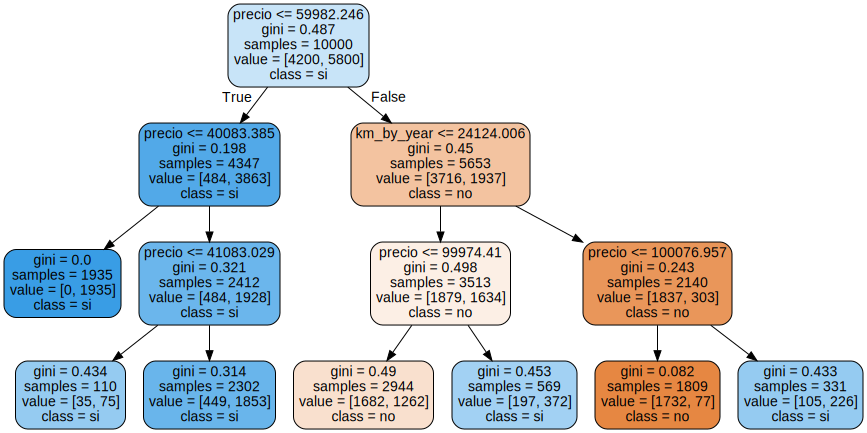

In [12]:
# gráfico del árbol de decisión
from sklearn.tree import export_graphviz
import graphviz

# generar el modelo de prueba, esto es resultado del entrenamiento de los 10 modelos
# modelo.fit(las_caracteristicas, variable_a_predecir)
modelo.fit(x_ord, y_ord)

features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=['no', 'si'], feature_names=features)

# guarda el resultado de la visualización
graph = graphviz.Source(dot_data)
graph

Profundidad de 10

In [13]:
# modelo DecisionTreeClassifier (árbol de decisión), GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

# el modelo será probado 10 veces y a generado 10 modelos
cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 77.19
Intervalo [75.26, 79.13]


* notamos que al aumentar la profundidad la precisión baja
* aumentar la profundidad no siempre significa mejorar la precisión
* es necesario usar el valor ideal para mejorar/optimizar el modelo
* los valores que se establecen antes de entrenar un modelo se llaman hiperparámetros
* parámetros: valores que se generar luego del entrenamiento (nosotros no lo establecemos, el modelo lo indica)
* como elegimos el valor ideal para 'max_depth' y los demás?

## Probar parámetros

In [14]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  # el modelo será probado 10 veces y a generado 10 modelos
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth = %d, testing = %.2f' % (max_depth, test_score))


for i in range(1,33):
  iniciar_arbol_de_decision(i)

Arbol max_depth = 1, testing = 75.78
Arbol max_depth = 2, testing = 75.78
Arbol max_depth = 3, testing = 78.67
Arbol max_depth = 4, testing = 78.63
Arbol max_depth = 5, testing = 78.56
Arbol max_depth = 6, testing = 78.12
Arbol max_depth = 7, testing = 77.96
Arbol max_depth = 8, testing = 77.86
Arbol max_depth = 9, testing = 77.38
Arbol max_depth = 10, testing = 77.19
Arbol max_depth = 11, testing = 76.97
Arbol max_depth = 12, testing = 76.49
Arbol max_depth = 13, testing = 75.81
Arbol max_depth = 14, testing = 75.66
Arbol max_depth = 15, testing = 75.16
Arbol max_depth = 16, testing = 75.11
Arbol max_depth = 17, testing = 74.74
Arbol max_depth = 18, testing = 74.33
Arbol max_depth = 19, testing = 74.34
Arbol max_depth = 20, testing = 74.22
Arbol max_depth = 21, testing = 73.80
Arbol max_depth = 22, testing = 73.81
Arbol max_depth = 23, testing = 73.38
Arbol max_depth = 24, testing = 73.43
Arbol max_depth = 25, testing = 73.14
Arbol max_depth = 26, testing = 73.04
Arbol max_depth = 27,

* lo ideal es que si es más profundo(tenga más información) el árbol  estará mejor preparado para tomar una mejor decisión en los datos de prueba, pero aquí no pasa debido a que los datos entrenaron bien que memorizaron los datos de entrenamiento, pero aún no están preparados para datos reales, a esto se llama overfitting
* overfitting: El sobreajuste es un comportamiento de aprendizaje automático no deseado que se produce cuando el modelo de aprendizaje automático proporciona predicciones precisas para los datos de entrenamiento, pero no para los datos nuevos.

Solución
## Explorando hiperparámetros en una dimensión


In [15]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  # el modelo será probado 10 veces y a generado 10 modelos
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)

  # return_train_score=True     en true para mostrar los datos de entrenamiento
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100

  # datos de entrenamiento
  train_score = results['train_score'].mean()*100

  print('Arbol max_depth = %d, training = %.2f, testing = %.2f' % (max_depth, train_score, test_score))
  tabla = [max_depth, train_score, test_score]
  return tabla


resultados = [iniciar_arbol_de_decision(i) for i in range(1, 33)]
# convirtiendo la lista de listas a un dataframe
resultados = pd.DataFrame(resultados, columns=['max_depth', 'train', 'test'])
resultados.head()

Arbol max_depth = 1, training = 75.79, testing = 75.78
Arbol max_depth = 2, training = 75.79, testing = 75.78
Arbol max_depth = 3, training = 78.75, testing = 78.67
Arbol max_depth = 4, training = 78.79, testing = 78.63
Arbol max_depth = 5, training = 78.94, testing = 78.56
Arbol max_depth = 6, training = 79.17, testing = 78.12
Arbol max_depth = 7, training = 79.50, testing = 77.96
Arbol max_depth = 8, training = 79.89, testing = 77.86
Arbol max_depth = 9, training = 80.46, testing = 77.38
Arbol max_depth = 10, training = 81.16, testing = 77.19
Arbol max_depth = 11, training = 82.03, testing = 76.97
Arbol max_depth = 12, training = 82.89, testing = 76.49
Arbol max_depth = 13, training = 83.95, testing = 75.81
Arbol max_depth = 14, training = 85.03, testing = 75.66
Arbol max_depth = 15, training = 86.14, testing = 75.16
Arbol max_depth = 16, training = 87.19, testing = 75.11
Arbol max_depth = 17, training = 88.31, testing = 74.74
Arbol max_depth = 18, training = 89.26, testing = 74.33
A

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


<Axes: xlabel='max_depth', ylabel='train'>

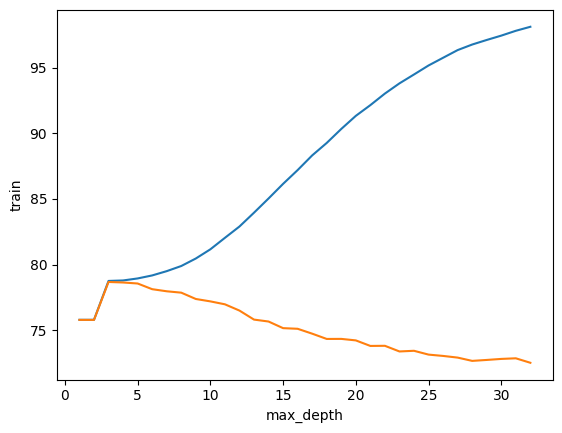

In [16]:
# viendo el overfitting de manera gráfica
import seaborn as sns
sns.lineplot(x='max_depth', y='train', data=resultados)
sns.lineplot(x='max_depth', y='test', data=resultados)

<Axes: xlabel='max_depth', ylabel='train'>

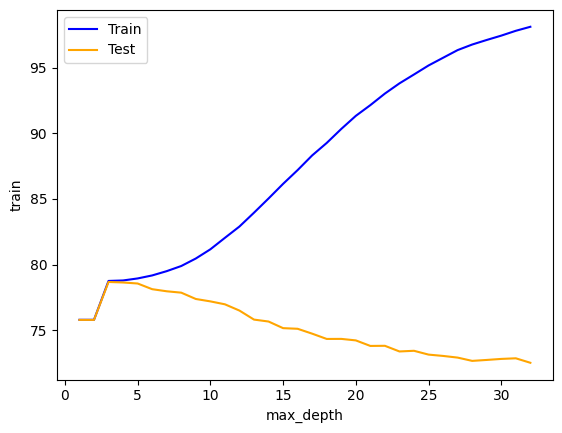

In [17]:
sns.lineplot(x='max_depth',y='train',data=resultados,color='blue',label='Train')
sns.lineplot(x='max_depth',y='test',data=resultados,color='orange',label='Test')

* ocurre overfitting: los datos aprenden tanto del entrenamiento que solo sirven para el entrenamiento, no consigue asimilar nuevas reglas que vienen del escenario real, solo sabe lo que le enseñamos
* vemos que el rendidiento/precisión de los datos de prueba(test) se reducen a medida que crece max_depth
* vemos que el rendidiento/precisión de los datos de entrenamiento(train) incrementan a medida que crece max_depth

In [18]:
# ordenando resultados descendentemente por la columna test
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


la mayor precisión para los datos de prueba es de 78.67 y ocurre cuando max_depth es 3

Espacio de parámetro: son los distintos valores que puede asumir un parámetro o un hiperparámetro de nuestro modelo

## Explorando hiperparámetros en dos dimensiones
* se busca encontrar la intersección del valor ideal para max_depth y min_sample_leaf
* iniciar_arbol_de_decision: recorre el espacio de parámetros combinado para cada uno de los 2 hiperparámetros: max_depth y min_samples_leaf

In [19]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  # el modelo será probado 10 veces y a generado 10 modelos
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)

  # return_train_score=True     en true para mostrar los datos de entrenamiento
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100

  # datos de entrenamiento
  train_score = results['train_score'].mean()*100

  print('Arbol max_depth = %d, min_samples_leaf = %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, train_score, test_score]
  return tabla


def buscar():
  resultados = []
  for max_depth in range(1, 32):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)

  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
  return resultados


resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 32, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 32, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 64, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 32, training = 78.

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [20]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
11,3,256,78.750993,78.672633
8,3,32,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633


pero hasta este punto solo se evaluaron 4 valores para min_samples_leaf, que pasaría si el mejor valor no se encuentra entre estos 4 valores? para ello usamos una matriz de correlación

In [21]:
# matriz de correlación
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.819789e-16,0.546146,-0.024381
min_samples_leaf,-2.819789e-16,1.000000e+00,-0.401773,0.341805
train,5.461464e-01,-4.017734e-01,1.000000,0.133720
test,-2.438091e-02,3.418055e-01,0.133720,1.000000


* cuando el valor para max_depth es mayor mejor será la precisión para los datos de entrenamiento, pero la precisión para los datos de prueba es baja
* cuando el valor para min_samples_leaf es mayor, mejor será la precisión para los datos de prueba y menor para los de entrenamiento

<Axes: >

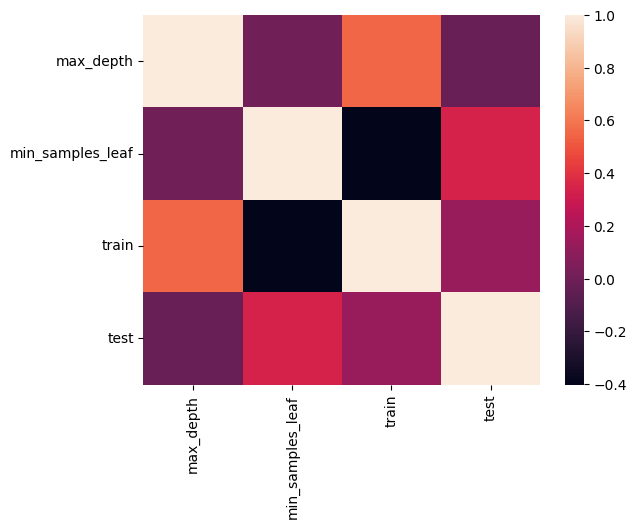

In [22]:
# viendolo en un mapa de calor
sns.heatmap(corr)

* mientras más claro es el gráfico mayor es el valor
* mientras más oscuro es el gráfico menor es el valor
* cuando el valor para max_depth es mayor mejor será la precisión para los datos de entrenamiento, pero la precisión para los datos de prueba es baja
* cuando el valor para min_samples_leaf es mayor, mejor será la precisión para los datos de prueba y menor para los de entrenamiento

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

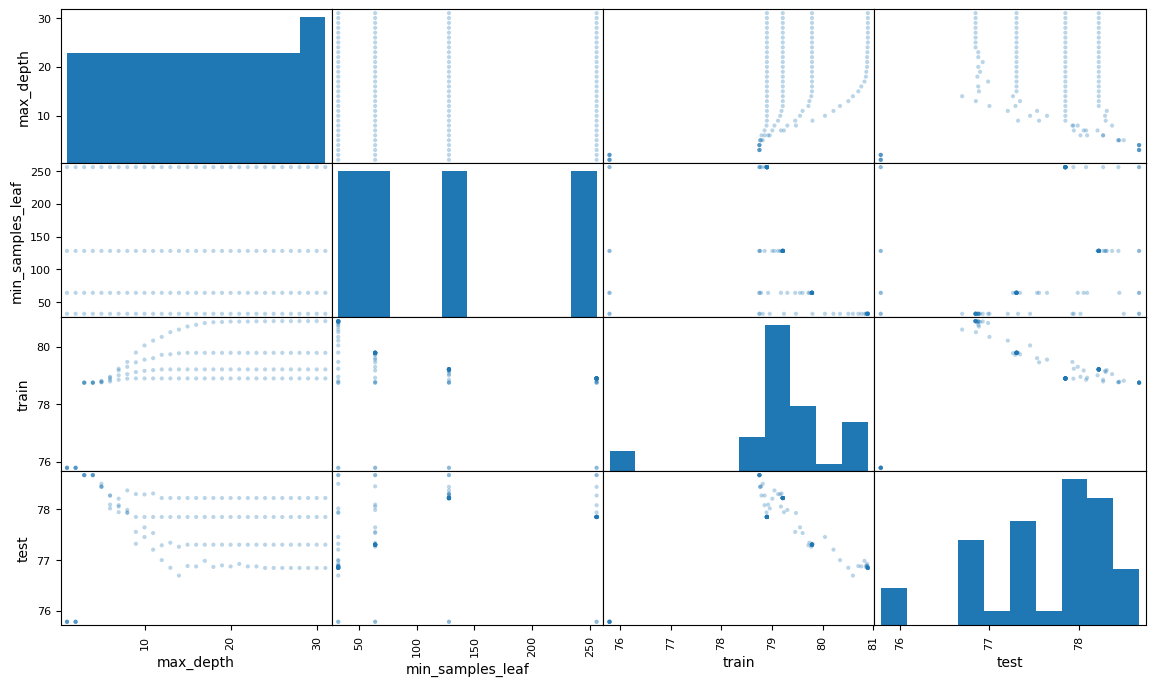

In [23]:
# ver en una matriz la matriz de correlacion
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

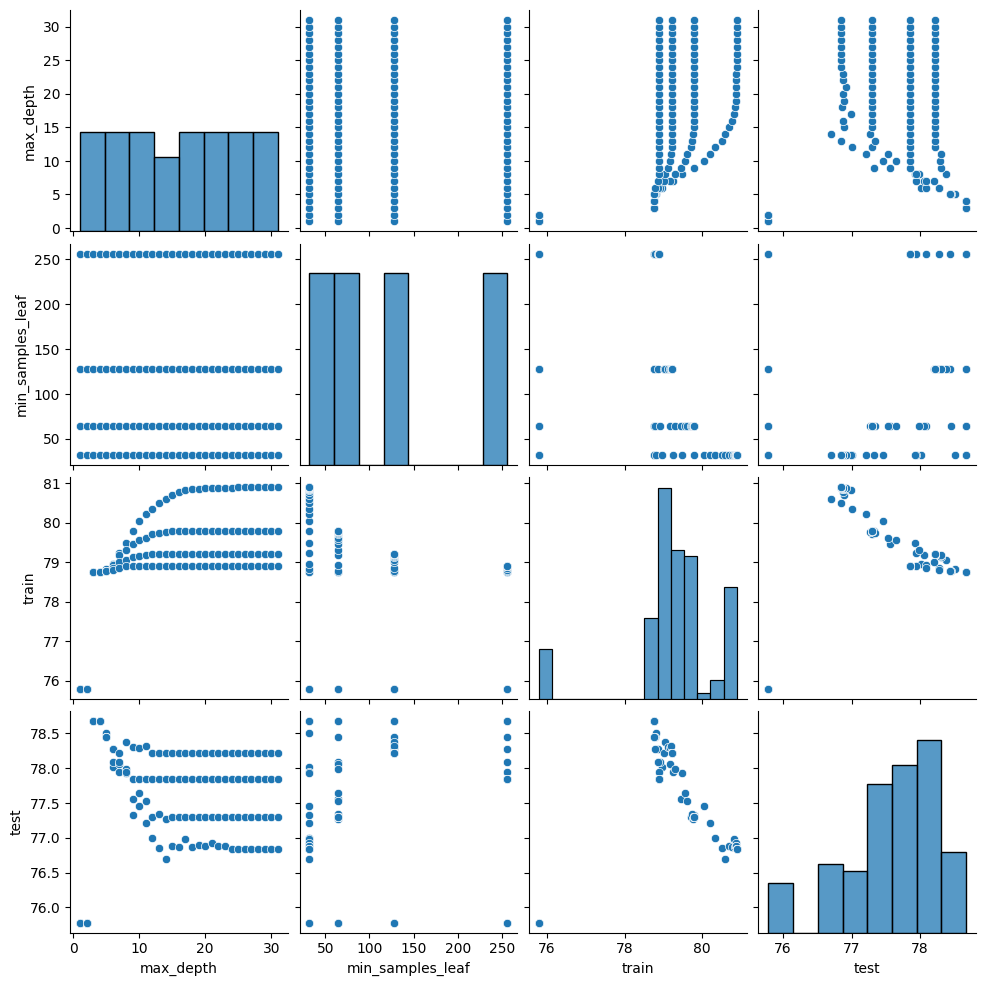

In [24]:
sns.pairplot(resultados)

* mientras mayor el max_depth menor la precisión de los datos de test
* mientrar mayor min_samples_leaf mejor la precisión de los datos de test
* hasta este punto notamos que los mejores valores para max_depth están entre 1 y 10
* y el rango de mejores valores para min_samples_leaf estan entre 130 y 256

<Axes: >

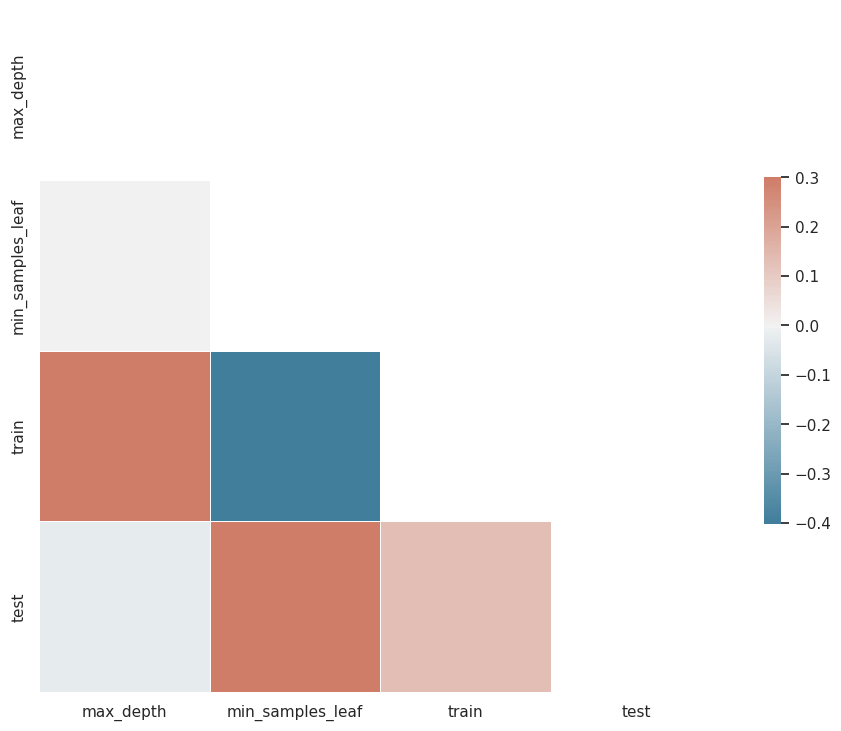

In [25]:
# Seaborn correlation
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


* hasta este punto notamos que los mejores valores para max_depth están entre 1 y 10
* y el rango de mejores valores para min_samples_leaf estan entre 130 y 256

In [26]:
def buscar():
  resultados = []
  for max_depth in range(1, 10):
    for min_samples_leaf in [130, 190, 220, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)

  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
  return resultados


resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 130, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 190, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 220, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 130, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 190, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 220, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 130, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 190, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 220, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 130, trainin

,max_depth,min_samples_leaf,train,test
0,1,130,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,130,75.791169,75.784219


In [27]:
# ordenando
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,130,78.750993,78.672633


## Explorando 3 dimensiones de hiper parámetros

In [28]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  # el modelo será probado 10 veces y a generado 10 modelos
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)

  # return_train_score=True     en true para mostrar los datos de entrenamiento
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100

  # tiempo de entrenamiento
  fit_time = results['fit_time'].mean()

  # tiempo en realizar la prueba
  score_time = results['score_time'].mean()

  # datos de entrenamiento
  train_score = results['train_score'].mean()*100

  print('Arbol max_depth = %d, min_samples_leaf = %d, min_samples_split =%d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla


def buscar():
  resultados = []
  for max_depth in range(1, 33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabla)

  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'min_samples_split', 'train', 'test', 'fit_time', 'score_time'])
  return resultados


resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split =32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split =64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split =128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split =256, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split =32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split =64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split =128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split =256, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split =32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split =64, training = 75.79, 

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.009578,0.004060
1,1,32,64,75.791169,75.784219,0.010116,0.003748
2,1,32,128,75.791169,75.784219,0.008900,0.003441
3,1,32,256,75.791169,75.784219,0.010664,0.003790
4,1,64,32,75.791169,75.784219,0.007598,0.003002


<Axes: >

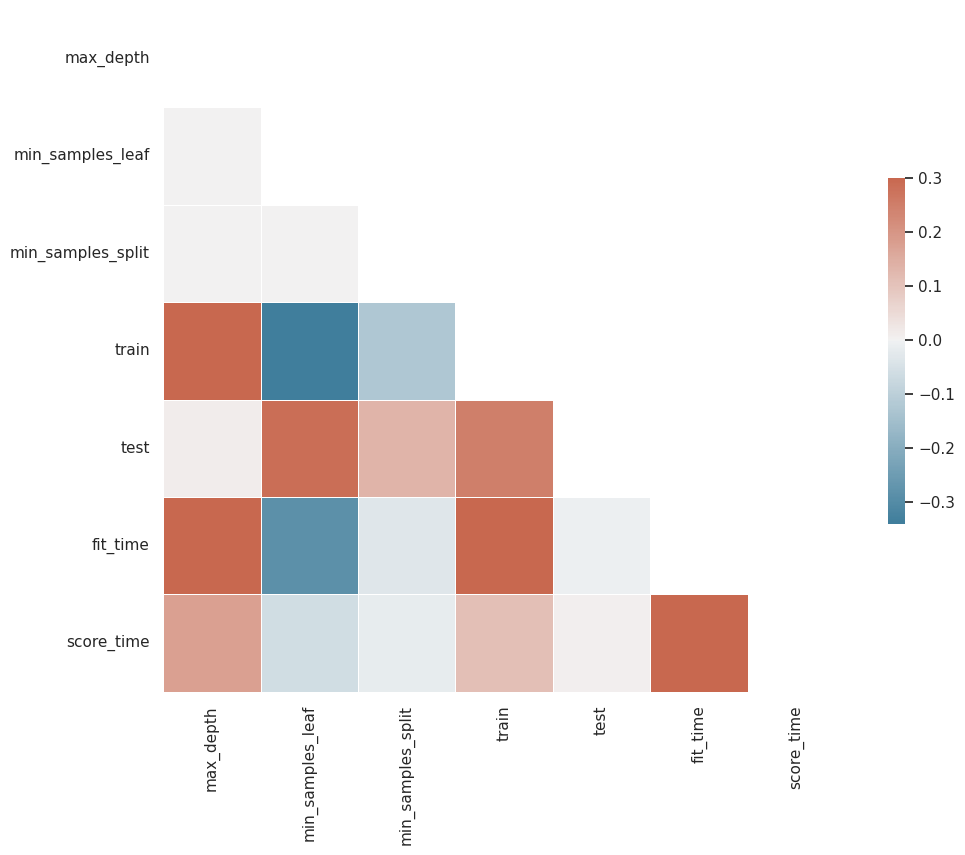

In [29]:
# matriz de correlación para la combinación de los 3 hiper parámetros
corr = resultados.corr()
# Seaborn correlation
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.017124,0.003206
48,4,32,32,78.750993,78.672633,0.013519,0.002493
34,3,32,128,78.750993,78.672633,0.011430,0.002306
35,3,32,256,78.750993,78.672633,0.012066,0.002735
36,3,64,32,78.750993,78.672633,0.011331,0.002392


## Explorando el espacio de hiper parámetros con GridSearchCV
Existe una forma para buscar el mejor valor para cada hiperparámetro y se logra a través de GridSearchCV

In [31]:
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,km_by_year,modelo
0,30941.02,1,18,35085.22134,22
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,12
3,95276.14,0,3,43167.32682,3
4,117384.68,1,4,12770.11290,4


Buscamos la mejor combinación de 4 hiperparámetros: , min_samples_split, min_samples_leaf, criterion

In [32]:
from sklearn.model_selection import GridSearchCV
SEED = 301
np.random.seed(SEED)

# criterion: criterio para realizar la validación cruzada

espacio_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

# cv = GroupKFold(n_splits = 10)    ->   existiran 10 grupos para cada validacion/combinacion
buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = GroupKFold(n_splits = 10))
# el resultado de los modelos/combinaciones se encuentran en buscar

# entrenar
buscar.fit(x_ord, y_ord, groups = datos.modelo)

# guardar los resultados en un dataframe
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012120,0.001691,0.002365,0.000087,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1
1,0.012793,0.001348,0.002627,0.000282,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1
2,0.013421,0.001848,0.002899,0.000626,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1
3,0.012379,0.000732,0.002862,0.000517,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1
4,0.012257,0.002497,0.002574,0.000346,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1


In [33]:
print(buscar.best_params_)
print(buscar.best_score_*100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.70228157349497


In [34]:
mejor = buscar.best_estimator_
# es el modelo/estimador con la mejor combinación luego de usar GridSearchCV, con la mejor precisión del modelo
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [35]:
# importando accurary_score
from sklearn.metrics import accuracy_score

# haciendo la predicción
prediccion = mejor.predict(x_ord)

# obtener la precisión
accuracy = accuracy_score(prediccion, y_ord) *100

# Accuracy para los datos reales usando la mejor combinación
print('Accuracy para los datos fue %.2f%%' % accuracy)


Accuracy para los datos fue 78.75%


## Nested Cross Validation
Escenario real

La documentación indica que es necesario hacer una validación cruzada sobre el mejor modelo, para hacer esta validación, el modelo no tuvo que usar GroupKFold previamente, es por ello que hacemos dos validaciones. La primera usando KFold y la segunda cross_val_score

In [36]:
# PRIMERA VALIDACIÓN CRUZADA (no se usa GroupKFold, en su lugar usamos KFold)
from sklearn.model_selection import KFold
SEED = 301
np.random.seed(SEED)

# criterion: criterio para realizar la validación cruzada

espacio_de_parametros = {
    'max_depth': [3, 5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

# cv = GroupKFold(n_splits = 10)    ->   existiran 10 grupos para cada validacion/combinacion
buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits = 5, shuffle = True))
# el resultado de los modelos/combinaciones se encuentran en buscar

# entrenar
buscar.fit(x_ord, y_ord)

# guardar los resultados en un dataframe
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010703,0.000607,0.002490,0.000041,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.010384,0.000278,0.002469,0.000029,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.010427,0.000441,0.002428,0.000066,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010405,0.000397,0.002422,0.000048,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.010159,0.000108,0.002498,0.000063,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [37]:
# SEGUNDA VALIDACIÓN CRUZADA encima del mejor modelo(buscar)

from sklearn.model_selection import cross_val_score
# n_splits = 5   ->  son 5 divisiones sobre el mejor modelo  -> devuelve 5 predicciones de las divisiones
scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits = 5, shuffle = True))
# nuevos valores de predicción, devuelve 5 predicciones de las divisiones
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [38]:
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.std() * 100
  print('Accuracy media %.2f' % media)
  print('Intervalo [%.2f, %.2f]' % (media - 2 * desviacion, media + 2 * desviacion))


In [39]:
# accuracy real en los datos reales
imprime_score(scores)

Accuracy media 78.67
Intervalo [76.80, 80.54]


In [40]:
# mostrar el mejor modelo
# mejor combinacion sobre el mejor modelo que obtuvimos en la primera validación cruzada
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

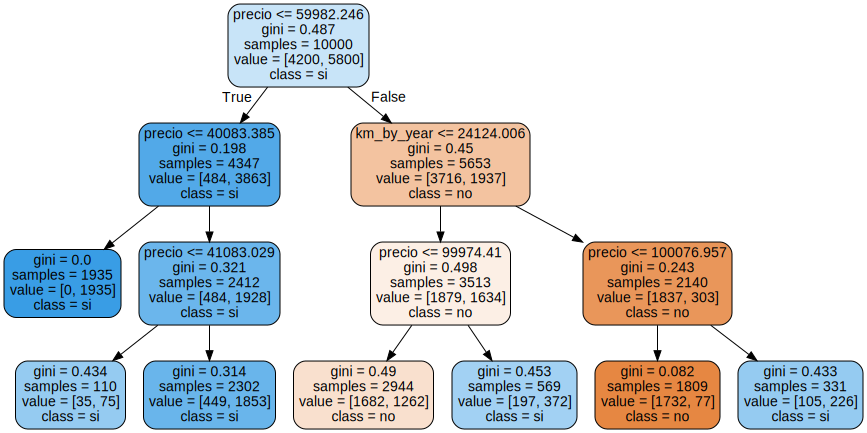

In [43]:
# árbol resultante de la doble validación cruzada
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None, filled = True, rounded = True,
                           class_names = ['no', 'si'],
                           feature_names = features)

graph = graphviz.Source(dot_data)
graph